In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
def clean_text(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    y = str(x.split(' ')[3])
    z = y.replace("'", "")
    return z

In [3]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def textcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    y = str(x.split('  ')[2])
    z = y.replace("'", "")
    return z

In [4]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def numcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    x.split('  ')
    if ' NaN' in x:
        y = str(x.split('  ')[1])
        z = y.replace("'", "")
        a = z.replace(" ", "")
        return a
    else:
        w = str(str1).split('\n')[0]
        x = str(w)
        y = str(x.split('  ')[2])
        z = y.replace("'", "")
        return z

In [5]:
dir = "C:/Users/kmanj/Manjavacas Research/Wilson_2014/"
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Wilson_2014/"

In [6]:
dwarfs_files = os.listdir(dir)
dwarf_dat = [archive for archive in dwarfs_files if archive.endswith(".txt")]
dwarf_dat

['2M0050.txt',
 '2M0106.txt',
 '2M0136.txt',
 '2M0348.txt',
 '2M0358.txt',
 '2M0439.txt',
 '2M0835.txt',
 '2M1010.txt',
 '2M1126.txt',
 '2M1207.txt',
 '2M1300.txt',
 '2M2139.txt',
 '2M2228.txt',
 '2M2255.txt']

In [7]:
general_data = pd.read_csv("C:/Users/kmanj/FITS_BD_Files/Repository_Data/Wilson_repo.csv", encoding = 'latin1')

In [9]:
Reference = 'Wilson et al 2014 A&A 566 A111'
Telescope = 'NTT (New Technology Telescope)'
Instrument = 'SofI (Son of ISAAC)'
filter1 = 'J_s'


In [10]:
new_name = []

# Iterate over the elements of the first list.
for archivo in dwarf_dat:
    first_5_characteres = 'J' +  archivo[2:6]
    
    # Iterate over the elements of the second list.
    for valor in general_data['Name_file']:
        # Extract the first 5 characters of the reference value
        valor = str(valor)
        first_5_values = valor[:5]
        
        # Compare the first 5 characters of the two elements
        if first_5_characteres == first_5_values:
            # Modify the file name to the desired format
            nuevo_nombre = valor + ".dat"
            # Add the new name to the new list
            new_name.append(valor)
            # Break the inner loop once a match is found.
            break

new_name;

In [13]:
Object = []
SpectralType = []
Jmag = []
Hmag = []
Kmag = []
RA = []
Dec = [-33.37785,
-59.55515,
9.563146,
-11.99157,
-60.37418,
-41.26834,
-23.88565,
3.45919,
-4.11387,
-50.06528,
2.74026,
-3.18699,
2.336575052,
-43.17396,
-57.21824,
19.20985,
-8.32326]
dJmag = []
dHmag = []
dKmag = []
TSTART = []


for i in range(len(new_name)): 
    Object.append(textcleaner(general_data['Name'][general_data['Name_file'] == new_name[i]]))
    SpectralType.append(textcleaner(general_data['SpT '][general_data['Name_file'] == new_name[i]]))
    Jmag.append(textcleaner(general_data['J'][general_data['Name_file'] == new_name[i]]))
    dJmag.append(numcleaner(general_data['dJ'][general_data['Name_file'] == new_name[i]]))
    Hmag.append(numcleaner(general_data['H'][general_data['Name_file'] == new_name[i]]))
    dHmag.append(numcleaner(general_data['dH'][general_data['Name_file'] == new_name[i]]))
    Kmag.append(numcleaner(general_data['K'][general_data['Name_file'] == new_name[i]]))
    dKmag.append(numcleaner(general_data['dK'][general_data['Name_file'] == new_name[i]]))
    RA.append(textcleaner(general_data['RA_deg'][general_data['Name_file'] == new_name[i]]))
    TSTART.append(numcleaner(general_data['T_Start'][general_data['Name_file'] == new_name[i]]))
    #Dec.append(numcleaner(general_data['DEC_deg'][general_data['Name_file'] == new_name[i]]))
TSTART

['55839.13744',
 '55845.12705',
 '55840.22016',
 '55840.2911',
 '55845.26826',
 '55844.28419',
 '56024.97656',
 '56023.97974',
 '56025.97409',
 '56025.25393',
 '56026.14799',
 '55839.05344',
 '55842.00205',
 '55844.00525']

In [12]:
dwarfs_data = []
for i in range(len(new_name)):
    data = pd.read_csv("{}{}".format(dir,dwarf_dat[i]), header=None, sep=' ')
    dwarfs_data.append(data)
dwarfs_data

[         0         1         2
 0  0.00000  1.025077  0.009000
 1  0.01833  1.059631  0.008988
 2  0.03668  0.989674  0.009019
 3  0.05468  0.952126  0.009004
 4  0.07414  0.952839  0.009005
 5  0.09190  1.016782  0.008997
 6  0.10966  1.003871  0.009033,
          0         1         2
 0  0.00000  0.995820  0.008144
 1  0.02000  1.001522  0.008133
 2  0.04000  0.991593  0.008142
 3  0.07061  0.981485  0.008142
 4  0.09067  1.005091  0.008058
 5  0.13082  1.024490  0.008113,
          0         1         2
 0  0.00000  0.992317  0.005029
 1  0.01725  0.992743  0.005026
 2  0.03445  0.993706  0.005045
 3  0.05401  1.004073  0.005062
 4  0.07123  0.997447  0.005051
 5  0.08840  1.012104  0.005055
 6  0.10554  1.017959  0.005071
 7  0.12261  0.989651  0.005050,
          0         1         2
 0  0.00000  1.010211  0.003844
 1  0.01877  0.999493  0.003814
 2  0.03785  0.985478  0.003832
 3  0.05731  0.996064  0.003851
 4  0.07903  0.997583  0.003882
 5  0.10011  1.003059  0.003873
 6  0

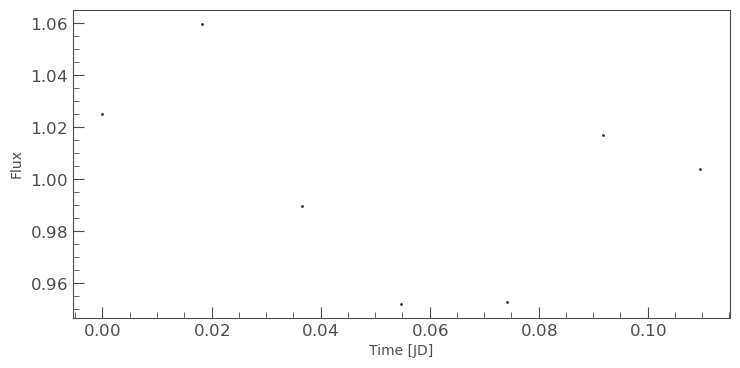

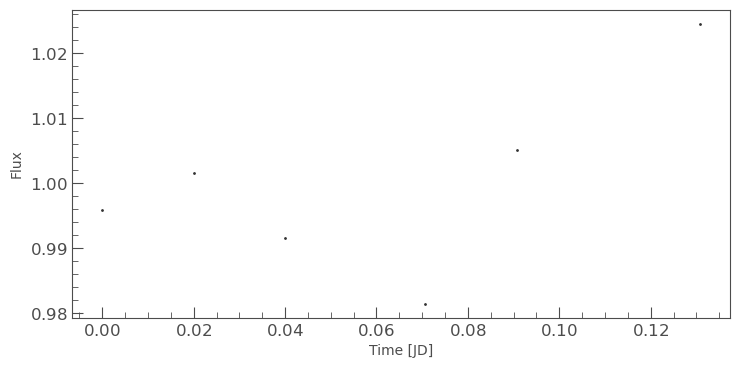

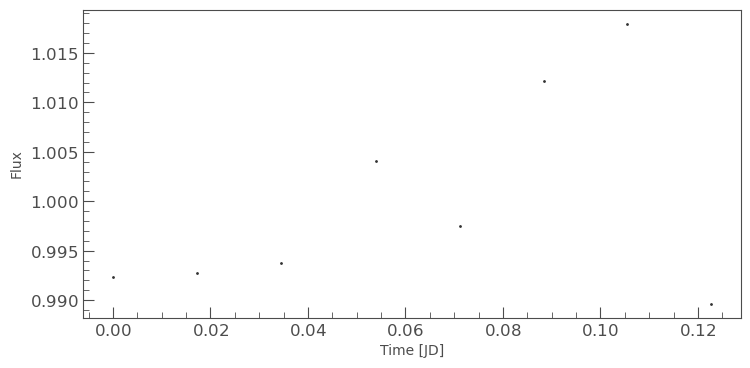

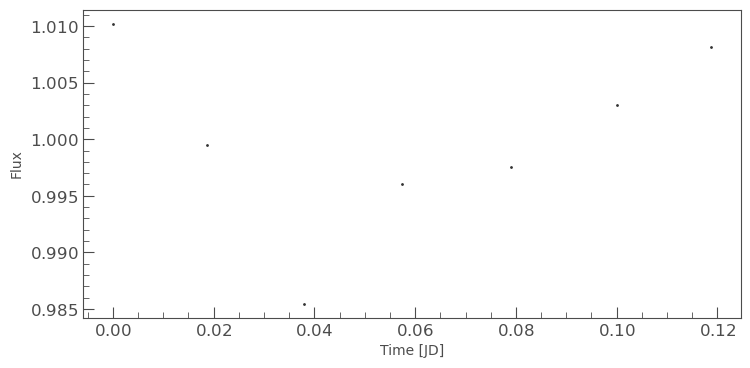

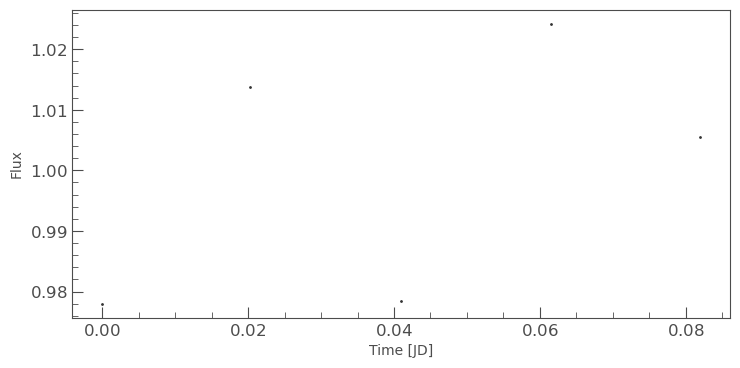

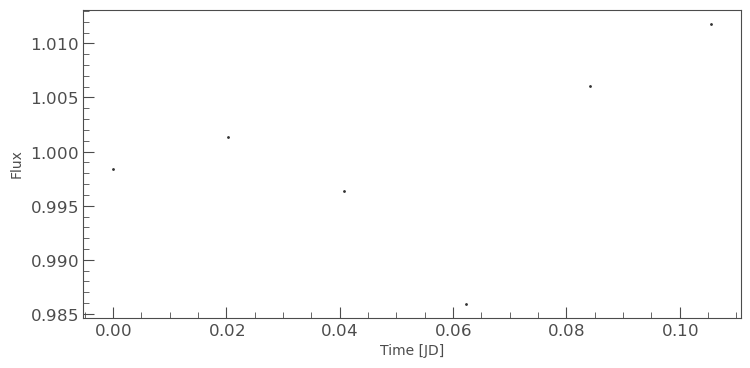

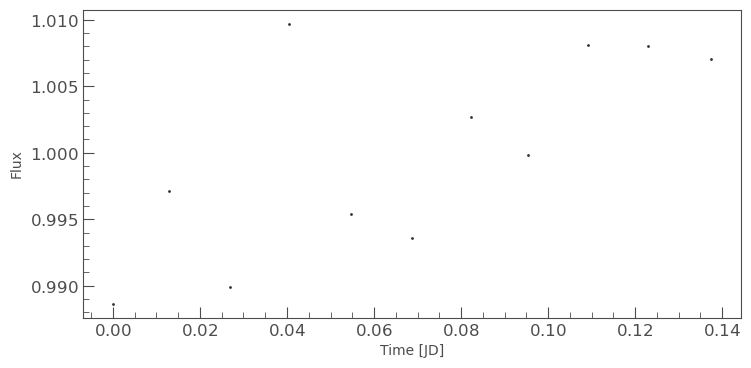

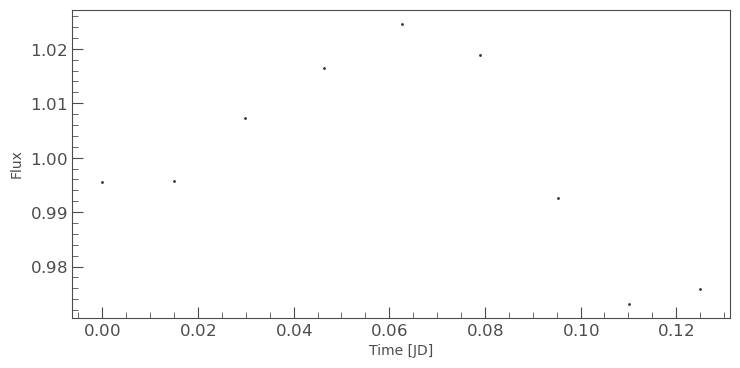

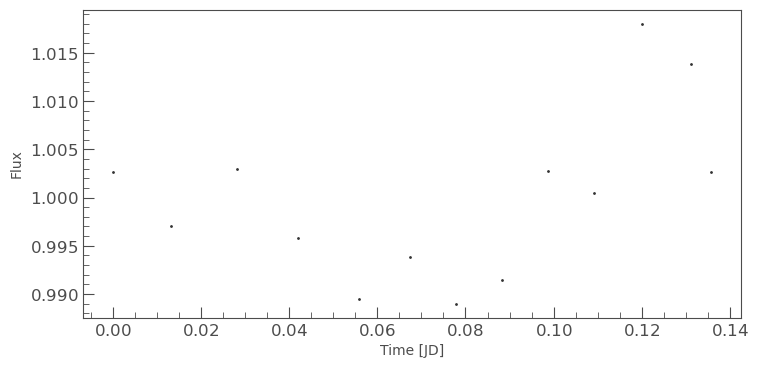

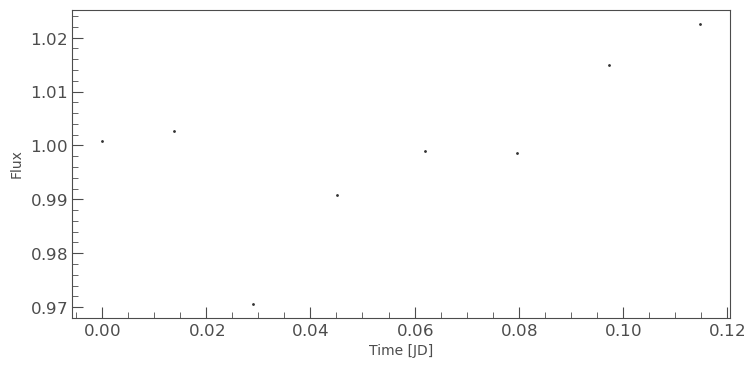

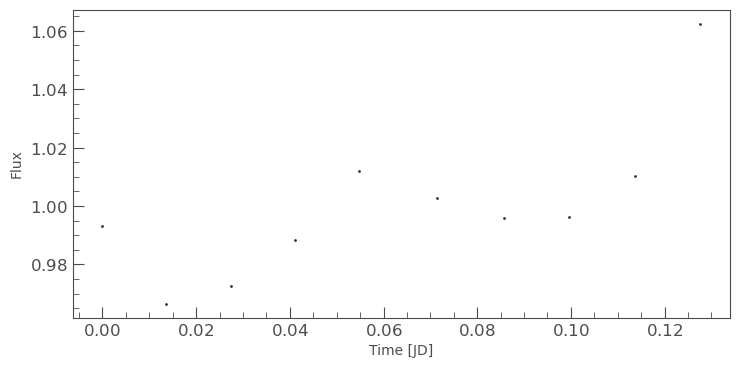

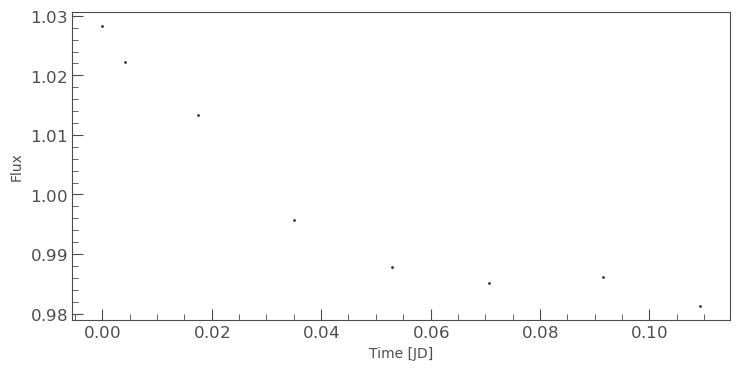

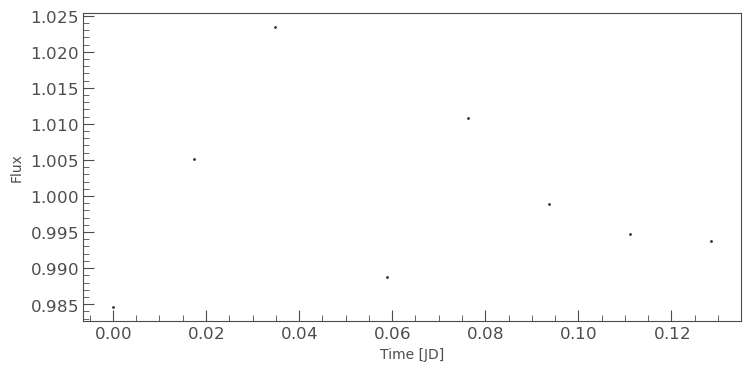

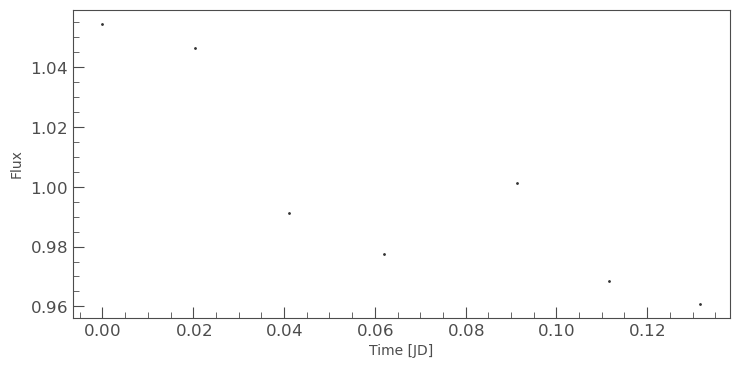

In [13]:
name_files = []
for i in range(len(dwarfs_data)):
    lc = l.LightCurve(time = list(dwarfs_data[i][0]) * u.d, flux = list(dwarfs_data[i][1]) * u.dimensionless_unscaled, flux_err = list(dwarfs_data[i][2]) * u.dimensionless_unscaled)
    lc.scatter()
    lc.to_fits(path = dir_save + Object[i] + '_Wils2014.fits')
    name_files.append(dir_save + Object[i] + '_Wils2014.fits')

In [14]:
for i in range(len(dwarf_dat)):
    with fits.open(name_files[i], mode = 'update') as f:
        f[0].header['OBJECT'] = Object[i]
        f[0].header['SPECTYPE'] = SpectralType[i]
        f[0].header['TSTART'] = TSTART[i]
        f[0].header['TIMESYS'] = 'mjd'
        f[0].header['TELESCOP'] = Telescope
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = filter1
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA[i]
        f[0].header['DEC_OBJ'] = Dec[i]
        f[0].header['JMAG'] = Jmag[i] + '+/-' + dJmag[i]
        f[0].header['HMAG'] = Hmag[i] + '+/-' + dHmag[i]
        f[0].header['KMAG'] = Kmag[i] + '+/-' + dKmag[i]

In [15]:
lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Wilson_2014/2MASS J00501994-3322402_Wils2014.fits", time_format = 'mjd')

<Axes: xlabel='Time', ylabel='Flux'>

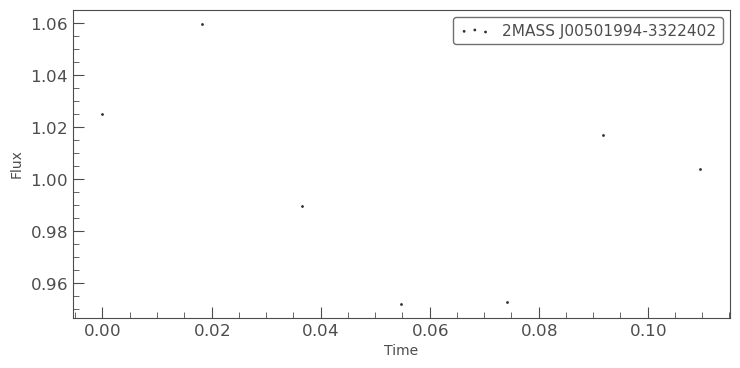

In [16]:
lc.scatter()

In [18]:
header = fits.getheader("C:/Users/kmanj/FITS_BD_Files/Data/Wilson_2014/2MASS J00501994-3322402_Wils2014.fits")

In [21]:
header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'Unofficial data product' / institution responsible for file          
DATE    = '2024-07-19'         / file creation date.                            
CREATOR = 'lightkurve.LightCurve.to_fits()' / pipeline job and program used t   
TELESCOP= 'NTT (New Technology Telescope)' / telescope                          
INSTRUME= 'SofI (Son of ISAAC)' / detector type                                 
OBJECT  = '2MASS J00501994-3